In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


train_path = "./resources/train.csv"

In [92]:
df = pd.read_csv(train_path)

In [93]:
column_labels = ['x' + str(i) for i in range(0,10)]
column_labels.append('n')
column_labels.append('y')
table = pd.DataFrame(columns=column_labels)
table.shape[0]

0

In [94]:
def add_game(table, sample):
    start_row = table.shape[0]
    for c in range(1, 401):
        try:
            x5 = sample.loc['stop.' + str(c)]
        except KeyError:
            x5 = 0

        try:
            x1 = sample.loc['stop.' + str(c - 21)]
        except KeyError:
            x1 = 0
        try:
            x2 = sample.loc['stop.' + str(c - 20)]
        except KeyError:
            x2 = 0
        try:
            x3 = sample.loc['stop.' + str(c - 19)]
        except KeyError:
            x3 = 0

        try:
            x4 = sample.loc['stop.' + str(c - 1)]
        except KeyError:
            x4 = 0
        try:
            x6 = sample.loc['stop.' + str(c + 1)]
        except KeyError:
            x6 = 0

        try:
            x7 = sample.loc['stop.' + str(c + 19)]
        except KeyError:
            x7 = 0
        try:
            x8 = sample.loc['stop.' + str(c + 20)]
        except KeyError:
            x8 = 0
        try:
            x9 = sample.loc['stop.' + str(c + 21)]
        except KeyError:
            x9 = 0
        n = sample.loc['delta']
        y = sample.loc['start.' + str(c)]
        table.loc[start_row - 1 + c] = [1, x1, x2, x3, x4, x5, x6, x7, x8, x9, n, y]
#         to_append = [1, x1, x2, x3, x4, x5, x6, x7, x8, x9, n, y]
    return table

In [95]:
# table = add_game(table, df.iloc[1])
# table = add_game(table, df.iloc[2])
# table.shape
for index, row in df.iterrows():
    table = add_game(table, row)
    print(index)
    if index > 100:
        break

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101


In [96]:
def plot_board(board, board_name="Board default name"):
    fig, ax = plt.subplots(ncols=1, figsize=(10, 5))
    ax.set_xticks([i for i in range(1, 21)])
    ax.set_yticks([i for i in range(1, 21)])
    ax.imshow(board, cmap=plt.cm.Greys)
    ax.set_title(board_name)
    return fig

In [98]:
stop_board = table.values[402:]
stop_board = stop_board.reshape(20, 20)
fig = plot_board(stop_board, board_name="stop board")

start_board = table.values[2:402]
start_board = start_board.reshape(20, 20)
fig = plot_board(start_board, board_name="start board")


ValueError: cannot reshape array of size 484776 into shape (20,20)

In [99]:
# theta
table.shape

(40800, 12)

In [100]:
def hypothesis(x, thetha):
    matr_mult = (thetha * (-1)).transpose().dot(x)
#     print(matr_mult)
    return 1 / (1 + np.exp(matr_mult[0]))

In [101]:
theta = np.random.randn(11, 1)
x = table.iloc[1, :-1]
# x
# type(x)

In [102]:
res = hypothesis(x, theta)
print(res)

0.9551232905056839


In [103]:
def cost(h_x, y):
    if y == 1:
        return -np.log(h_x)
    elif y == 0:
        return -np.log(1 - h_x)

In [104]:
def loss(table, theta):
    m = table.shape[0]
    summa = 0
    for i in range(m):
        x = table.iloc[i][:-1]
        y = table.loc[i, ['y']]
        h_x = hypothesis(x, theta)
        summa += cost(h_x, y[0])
    return summa / m
        

In [105]:
loss(table, theta)
print(theta)

[[ 1.22590786]
 [ 0.70659499]
 [-1.0875319 ]
 [-0.67047384]
 [-0.07705887]
 [-0.01798459]
 [-0.96377318]
 [-0.6816715 ]
 [-0.01164094]
 [ 1.59216842]
 [ 0.45800341]]


In [106]:
def g_decent(table, theta, alpha=0.005):
    m = table.shape[0]
    for j in range(len(theta)):
        summa = 0
        for i in range(m):
            x = table.iloc[i][:-1]
            y = table.loc[i, ['y']]
            summa += (hypothesis(x, theta) - y) * x[j]
        theta[j] = theta[j] - (alpha / m) * summa
    return theta
            
    

In [107]:
theta = g_decent(table, theta)
theta

array([[ 1.22207808],
       [ 0.70627055],
       [-1.08776019],
       [-0.6707301 ],
       [-0.07735521],
       [-0.01819727],
       [-0.96402422],
       [-0.68194976],
       [-0.011928  ],
       [ 1.59181419],
       [ 0.4457742 ]])

In [109]:
df.iloc[0]

id          1
delta       4
start.1     0
start.2     0
start.3     0
start.4     0
start.5     0
start.6     0
start.7     0
start.8     0
start.9     0
start.10    0
start.11    0
start.12    0
start.13    0
start.14    0
start.15    0
start.16    0
start.17    0
start.18    0
start.19    0
start.20    0
start.21    0
start.22    0
start.23    0
start.24    0
start.25    0
start.26    0
start.27    0
start.28    0
           ..
stop.371    0
stop.372    0
stop.373    0
stop.374    0
stop.375    0
stop.376    0
stop.377    0
stop.378    0
stop.379    0
stop.380    0
stop.381    0
stop.382    1
stop.383    1
stop.384    0
stop.385    0
stop.386    0
stop.387    0
stop.388    0
stop.389    0
stop.390    0
stop.391    0
stop.392    0
stop.393    0
stop.394    0
stop.395    0
stop.396    0
stop.397    0
stop.398    0
stop.399    0
stop.400    0
Name: 0, Length: 802, dtype: int64

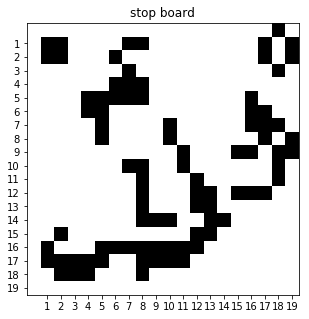

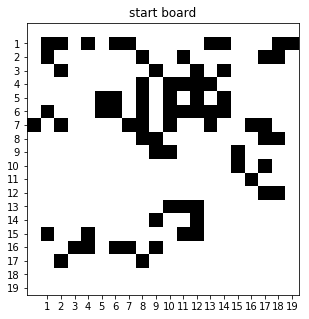

In [117]:
sample = df.iloc[3]
stop_board = sample.values[402:]
stop_board = stop_board.reshape(20, 20)
fig = plot_board(stop_board, board_name="stop board")

start_board = sample.values[2:402]
start_board = start_board.reshape(20, 20)
fig = plot_board(start_board, board_name="start board")

In [ ]:
from pprint import pprint

predict_board = []
X = table.loc[1200:1599, table.columns != 'y']
it = iter(X.values)
for line in start_board:
    predict_board_line = []
    for el in line:
        x = next(it)
        val = hypothesis(x, theta)
#         print(val)
        if val > .5:
            predict_board_line.append(1)
        else:
            predict_board_line.append(0)
    predict_board.append(predict_board_line)
pprint(predict_board)

In [ ]:
# import numpy as np

def rolling_window(a, shape):  # rolling window for 2D array
    s = (a.shape[0] - shape[0] + 1,) + (a.shape[1] - shape[1] + 1,) + shape
    strides = a.strides + a.strides
    return np.lib.stride_tricks.as_strided(a, shape=s, strides=strides)

a = np.array([[0,  1,  2,  3,  4,  5],
              [6,  7,  8,  9, 10,  11],
              [12, 13, 14, 15, 7,   8],
              [18, 19, 20, 21, 13, 14],
              [24, 25, 26, 27, 19, 20],
              [30, 31, 32, 33, 34, 35]], dtype=np.int)
b = np.arange(36, dtype=np.float).reshape(6,6)
present = np.array([[7,8],[13,14],[19,20]], dtype=np.int)
absent  = np.array([[7,8],[42,14],[19,20]], dtype=np.int)

found = np.all(np.all(rolling_window(a, present.shape) == present, axis=2), axis=2)
print(np.transpose(found.nonzero()))
found = np.all(np.all(rolling_window(b, present.shape) == present, axis=2), axis=2)
print(np.transpose(found.nonzero()))
found = np.all(np.all(rolling_window(a, absent.shape) == absent, axis=2), axis=2)
print(np.transpose(found.nonzero()))
